<a href="https://colab.research.google.com/github/helakhaddar/Graduation_project/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting the sentiment features
The bert model alrealdy fine-tuned on IMDB reviews, we used this model to extract the sentiment features directly whitout any further fine-tuning  

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PFE/Data/merged_data.csv")

In [ ]:
data.head()

,cleaned_text,label
0,inflammatory language is that an attempt at co...,0
1,note that i merged two articles due to proposa...,0
2,how did you become an administrator can take y...,0
3,you call it a characterization an analogy inte...,0
4,here is a match with ryan using the tourture r...,0


In [ ]:
df_res = pd.read_csv("/content/drive/MyDrive/PFE/Data/merged_data.csv")

In [ ]:
df_res.shape

(32450, 2)

In [ ]:
df_res.isnull().sum()

,0
cleaned_text,0
label,0


In [ ]:
test.isnull().sum()

,0
cleaned_text,0
label,0


## Importing the model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = TFAutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/670M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
def sentiment_score(text):

    # Tokenize the input text
    tokens = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors='tf')

    # Get the model's output logits
    result = model(tokens)

    # Find the index of the maximum logit and convert to integer
    class_prediction = tf.argmax(result.logits, axis=-1)

    # Convert the class_prediction tensor to an integer
    class_prediction = int(class_prediction.numpy()[0]) + 1

    if class_prediction <= 2:
        sentiment = -1
    elif class_prediction == 3:
        sentiment = 0
    else:
        sentiment = 1

    return  sentiment

## Process a batch of text

In [ ]:
# Define a function to process a batch of comments
def process_batch(df_batch):
    df_batch['sentiment'] = df_batch['cleaned_text'].apply(sentiment_score)
    return df_batch

In [ ]:
# Process data in batches
batch_size = 100  # Adjust the batch size based on your memory and speed requirements
batches = [df_res[i:i + batch_size] for i in range(0, df_res.shape[0], batch_size)]

In [ ]:
test_sample =data.sample(1000)
# Process data in batches
batch_size = 100  # Adjust the batch size based on your memory and speed requirements
batches = [data[i:i + batch_size] for i in range(0, data.shape[0], batch_size)]

In [ ]:
data.shape

(12428, 2)

In [ ]:
processed_batches = []

for batch in batches:
    processed_batch = process_batch(batch)
    processed_batches.append(processed_batch)


<ipython-input-8-1c485adf0537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['sentiment'] = df_batch['cleaned_text'].apply(sentiment_score)
<ipython-input-8-1c485adf0537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['sentiment'] = df_batch['cleaned_text'].apply(sentiment_score)
<ipython-input-8-1c485adf0537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
data = pd.concat(processed_batches, ignore_index=True)

In [ ]:
data.sentiment.value_counts()

,count
sentiment,
-1,8856
1,1871
0,1701


In [ ]:
data

,cleaned_text,label,sentiment
0,inflammatory language is that an attempt at co...,0,-1
1,note that i merged two articles due to proposa...,0,-1
2,how did you become an administrator can take y...,0,-1
3,you call it a characterization an analogy inte...,0,-1
4,here is a match with ryan using the tourture r...,0,1
...,...,...,...
12423,nigel is a crazy idiot,1,1
12424,well now dont i feel stupid,1,-1
12425,fourth baldrick possibly being cleverer than i...,1,-1
12426,iran thats right it was our drone and spreadin...,1,-1


In [ ]:
data.to_csv("/content/drive/MyDrive/PFE/Data/Data_with_Sentiment.csv.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
def plot_relation_sent_label(df):
  sent_label_cross = pd.crosstab(df['sentiment'], df['label'])
  sent_label_cross['sum'] = sent_label_cross[0.0] + sent_label_cross[1.0]
  sent_label_cross['non bullying tweet %'] = sent_label_cross[0.0]/sent_label_cross['sum']*100
  sent_label_cross['bullying tweet %'] = sent_label_cross[1.0]/sent_label_cross['sum']*100
  sent_label_cross = sent_label_cross.drop([0.0, 1.0, 'sum'], axis=1)

  ax = sent_label_cross.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5'], width=0.8)
  plt.xlabel('Sentiment')
  plt.ylabel('percentage %')
  plt.title('Relation between sentiment and bullying')
  ax.legend(loc='lower right')
  plt.show()

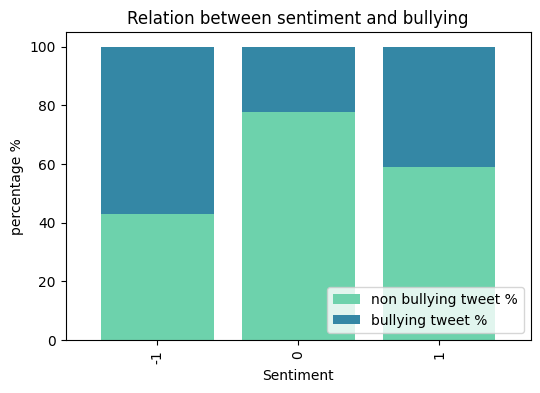

In [ ]:
plot_relation_sent_label(data)